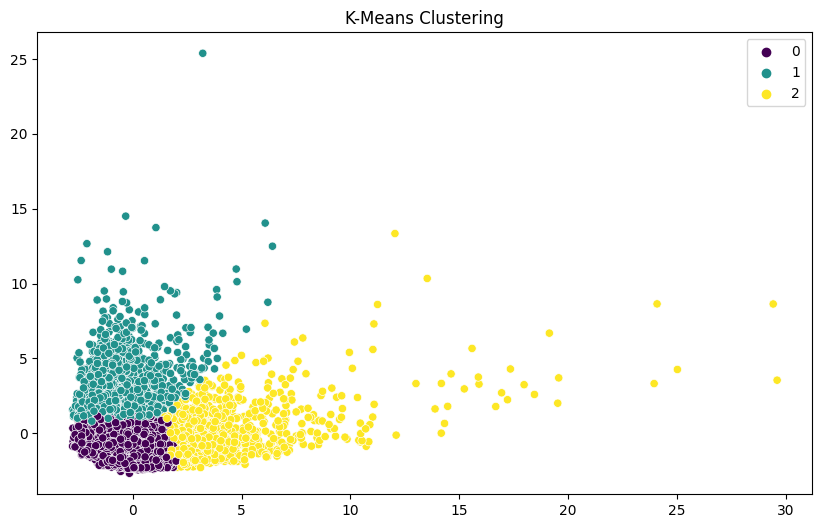

Silhouette Score: 0.2505299806322502


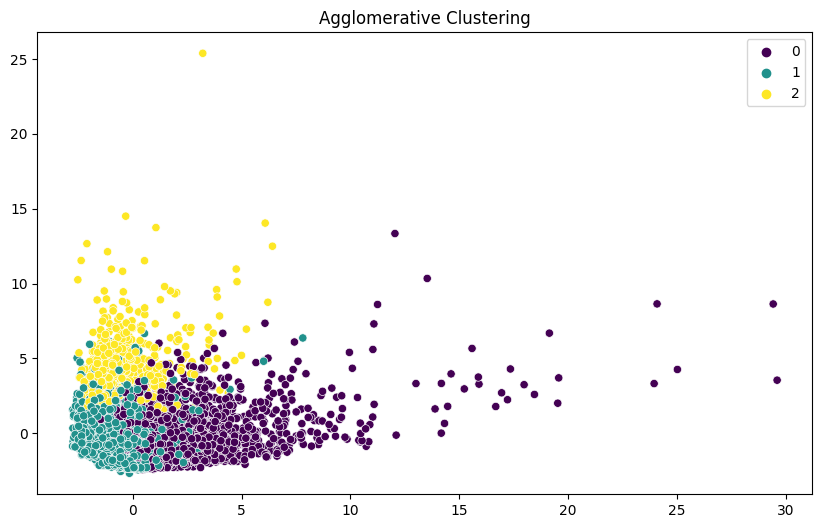

Silhouette Score: 0.1731098007232828


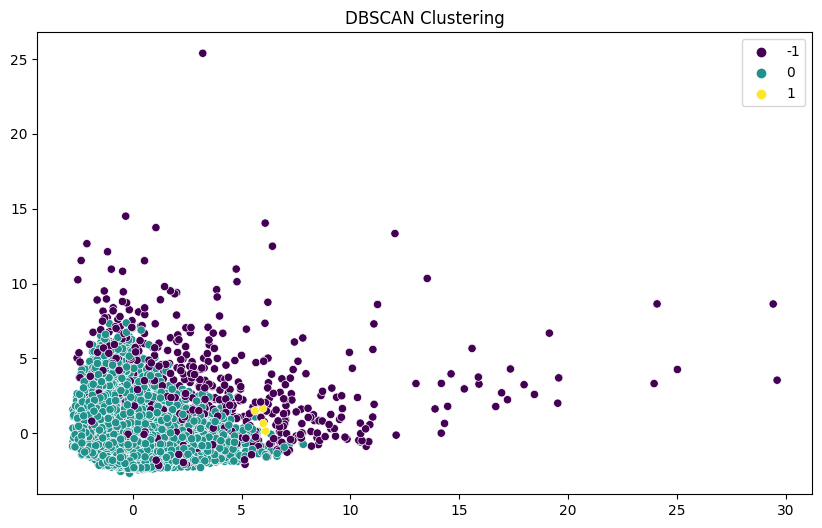

Silhouette Score: 0.3970279181847056


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df = pd.read_csv("/kaggle/input/lab5faridonov/cc_general.csv")
df = df.drop("CUST_ID", axis=1)
df.fillna(df.mean(), inplace=True)

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

def perform_clustering(clustering_algo, data, title):
    labels = clustering_algo.fit_predict(data)

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=labels, palette="viridis", legend="full")
    plt.title(title)
    plt.show()

    silhouette_avg = silhouette_score(data, labels)
    print(f"Silhouette Score: {silhouette_avg}")

kmeans = KMeans(n_clusters=3,n_init=10, random_state=42)
perform_clustering(kmeans, df_scaled, "K-Means Clustering")

agg_clustering = AgglomerativeClustering(n_clusters=3)
perform_clustering(agg_clustering, df_scaled, "Agglomerative Clustering")

dbscan = DBSCAN(eps=2, min_samples=5)
perform_clustering(dbscan, df_scaled, "DBSCAN Clustering")


In [4]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

def evaluate_metrics(data, labels,name):
    silhouette_avg = silhouette_score(data, labels)
    calinski_harabasz = calinski_harabasz_score(data, labels)
    davies_bouldin = davies_bouldin_score(data, labels)

    print(f"Name: {name}")
    print(f"Silhouette Score: {silhouette_avg}")
    print(f"Calinski-Harabasz Index: {calinski_harabasz}")
    print(f"Davies-Bouldin Index: {davies_bouldin}")

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(df_scaled)
evaluate_metrics(df_scaled, kmeans_labels,"kmeans")

agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_clustering.fit_predict(df_scaled)
evaluate_metrics(df_scaled, agg_labels,"agg_clustering")

dbscan = DBSCAN(eps=2, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_scaled)
evaluate_metrics(df_scaled, dbscan_labels,"dbscan")


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Name: kmeans
Silhouette Score: 0.2505299806322502
Calinski-Harabasz Index: 1604.3947142489408
Davies-Bouldin Index: 1.59756324899834
Name: agg_clustering
Silhouette Score: 0.1731098007232828
Calinski-Harabasz Index: 1270.5039171504427
Davies-Bouldin Index: 1.797923175689862
Name: dbscan
Silhouette Score: 0.3970279181847056
Calinski-Harabasz Index: 487.95983647748756
Davies-Bouldin Index: 1.9726971449037343


Эти метрики оценивают качество кластеризации для трех различных алгоритмов: k-средних (kmeans), иерархической агломеративной кластеризации (agg_clustering) и алгоритма DBSCAN (dbscan).

Silhouette Score (Оценка силуэта): Эта метрика измеряет, насколько объект хорошо соответствует своему собственному кластеру по сравнению с другими кластерами. Чем ближе значение к 1, тем лучше. Для dbscan значение 0.397 достаточно высокое, что указывает на хорошую структуру кластеров, в то время как для kmeans (0.250) и agg_clustering (0.173) эта оценка ниже.

Calinski-Harabasz Index (Индекс Calinski-Harabasz): Этот индекс оценивает плотность и разделение между кластерами. Большие значения указывают на более четкие и компактные кластеры. У kmeans и agg_clustering этот индекс выше, что свидетельствует о лучшей разделимости кластеров.

Davies-Bouldin Index (Индекс Davies-Bouldin): Мера средней схожести между каждым кластером и его наиболее похожим кластером. Значения ближе к нулю указывают на лучшую кластеризацию. dbscan с более высоким значением (1.97) имеет большую различимость между кластерами, чем kmeans (1.59) и agg_clustering (1.79).

Исходя из этих метрик, dbscan имеет самую высокую оценку Silhouette Score, но более низкие значения Calinski-Harabasz и Davies-Bouldin Index по сравнению с kmeans и agg_clustering. В то же время, kmeans и agg_clustering показывают более высокий индекс Calinski-Harabasz, что может указывать на более четкие кластеры, особенно в kmeans.